<a href="https://colab.research.google.com/github/arupmondalds/RapidMiner_PoC/blob/main/IRIS_Simulation_for_Rapid_Miner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 0: Load required libraries**

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Task: Load the data into the stage **bold text**

In [37]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# List all uploaded files
for file_name in uploaded.keys():
    print(f'User uploaded file "{file_name}" with length {len(uploaded[file_name])} bytes')

# Read the uploaded file into a df_initialFrame
data = pd.read_csv(list(uploaded.keys())[0])

# Display the first few rows of the df_initialFrame
print(data.head())


Saving CustomerData.csv to CustomerData.csv
User uploaded file "CustomerData.csv" with length 4013535 bytes
     Id   age           job  marital  education default  balance housing loan  \
0  1001   NaN    management  married   tertiary      no   2143.0     yes   no   
1  1002   NaN           NaN   single  secondary      no     29.0     yes   no   
2  1003   NaN  entrepreneur  married  secondary      no      2.0     yes  yes   
3  1004  47.0   blue-collar  married    unknown      no   1506.0     yes   no   
4  1005  33.0       unknown   single    unknown      no      1.0      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198    

**Task: Descriptive Statistics:Vizualize the data distribution and statistics**

Numerical Statistics:
                 Id           age        balance           day      duration  \
count  45211.000000  45211.000000   45211.000000  45211.000000  45211.000000   
mean   23606.000000     40.933114    1362.285948     15.806419    258.163080   
std    13051.435847     10.621786    3044.760471      8.322476    257.527812   
min     1001.000000     -1.000000   -8019.000000      1.000000      0.000000   
25%    12303.500000     33.000000      72.000000      8.000000    103.000000   
50%    23606.000000     39.000000     448.000000     16.000000    180.000000   
75%    34908.500000     48.000000    1428.000000     21.000000    319.000000   
max    46211.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  45211.000000  45211.000000  45211.000000  
mean       2.763841     40.197828      0.580323  
std        3.098021    100.128746      2.303441  
min        1.000000     -1.000000      0.000000  
25%    

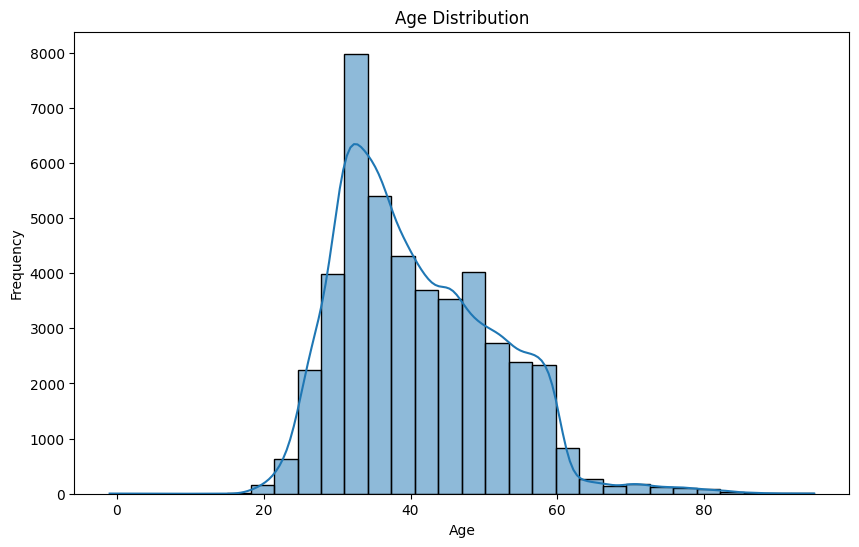

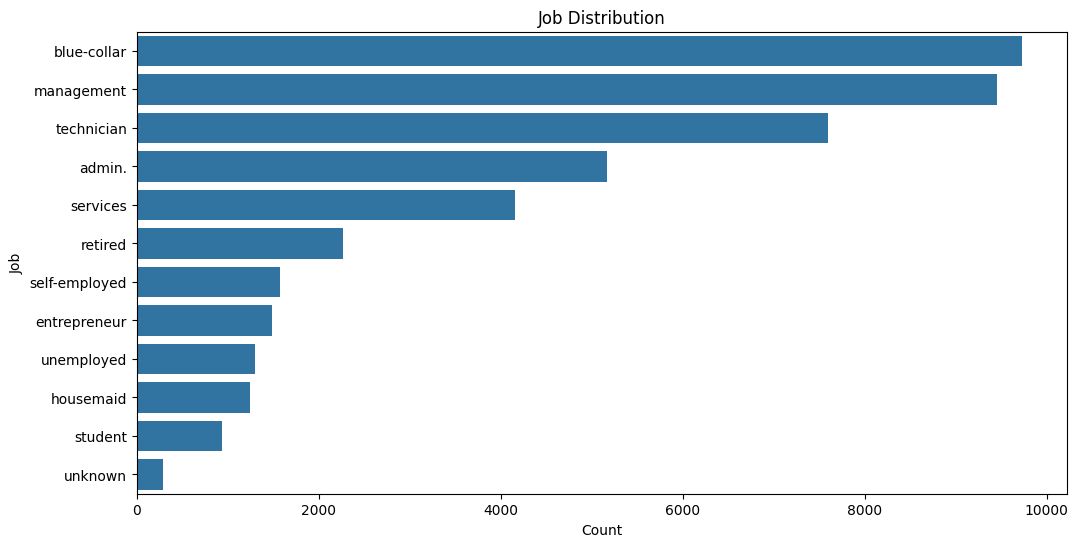

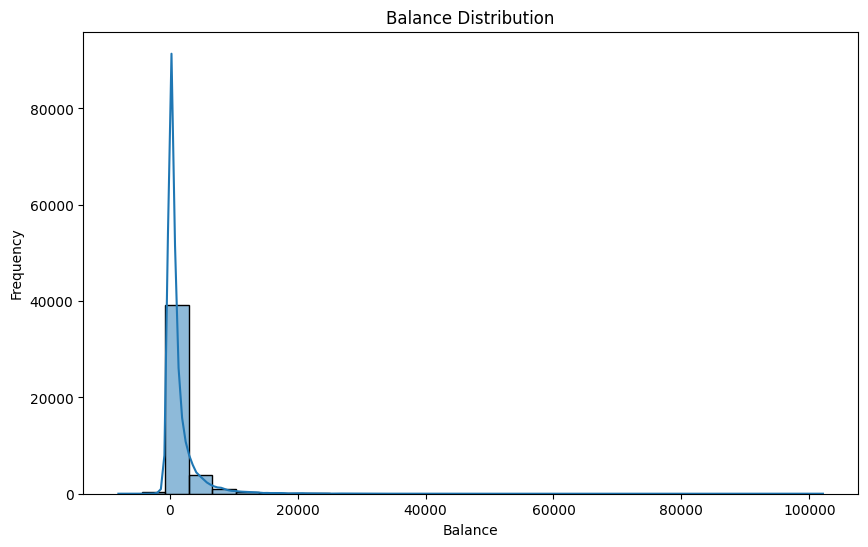

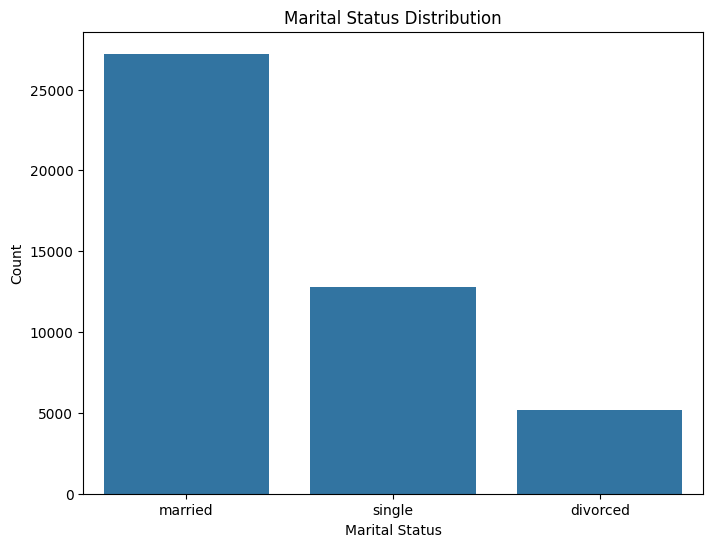

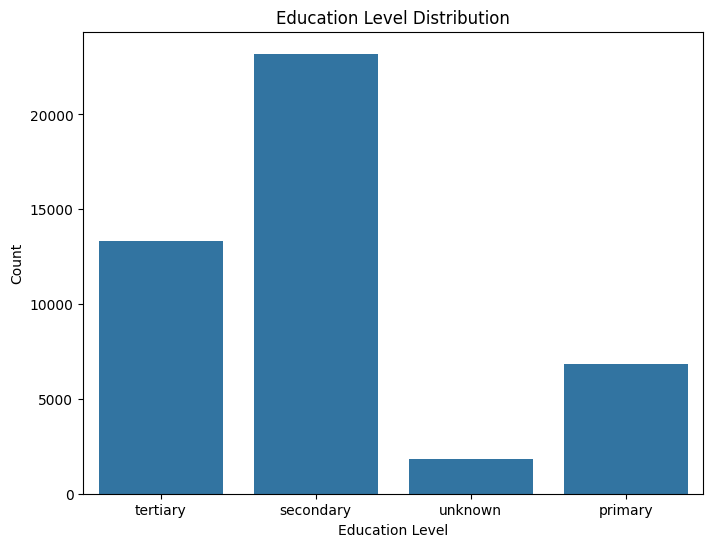

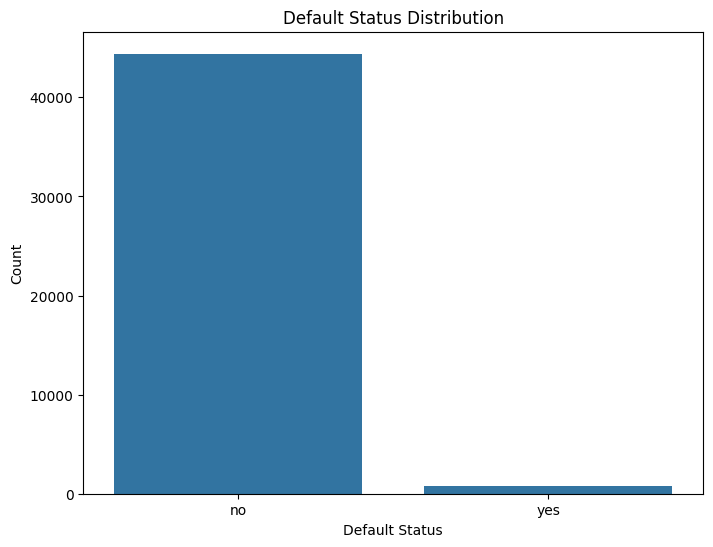

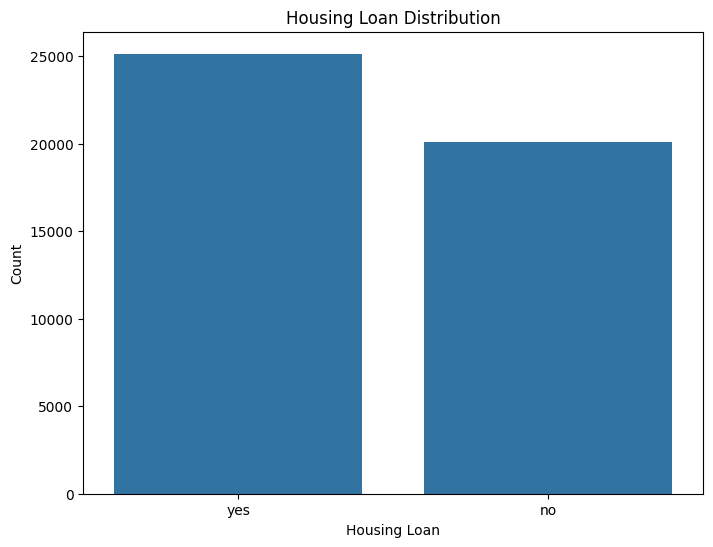

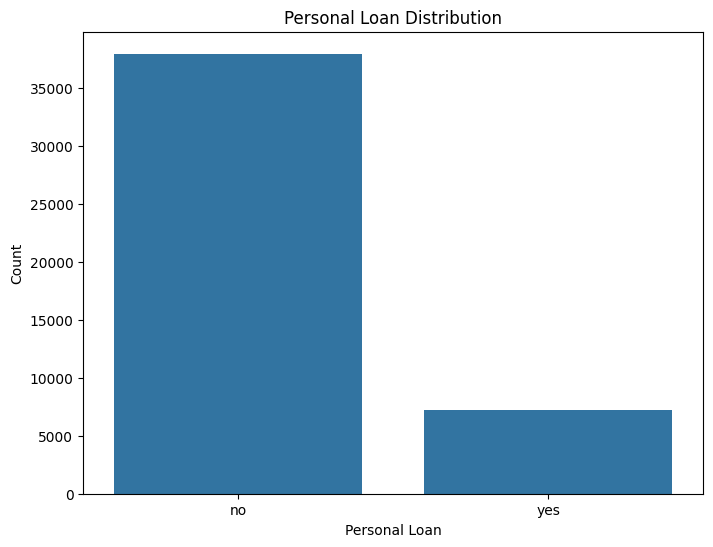

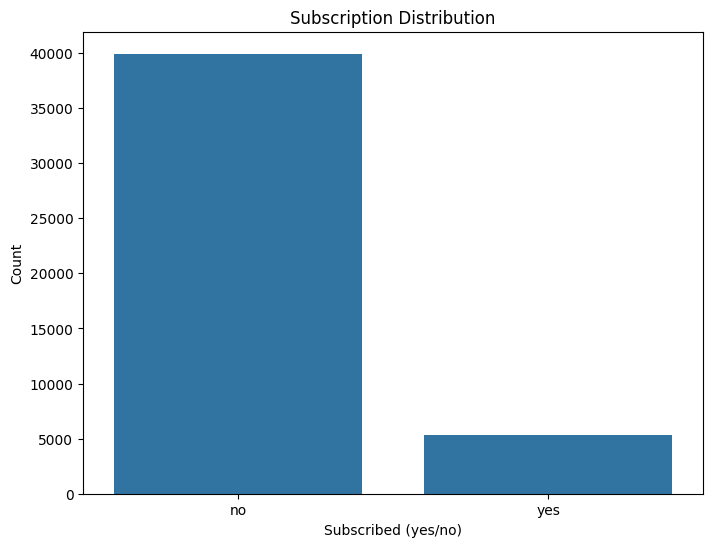

In [38]:
# Data Cleanup
# Impute missing values
data['age'].fillna(data['age'].median(), inplace=True)
data['job'].fillna(data['job'].mode()[0], inplace=True)
data['balance'].fillna(data['balance'].median(), inplace=True)

# Descriptive Statistics
numerical_stats = data.describe()
categorical_stats = data.describe(include=['object'])

# Display Descriptive Statistics
print("Numerical Statistics:")
print(numerical_stats)
print("\nCategorical Statistics:")
print(categorical_stats)

# Visualizations

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Job Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='job', data=data, order=data['job'].value_counts().index)
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

# Balance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['balance'], bins=30, kde=True)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='marital', data=data)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Education Level Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='education', data=data)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Default Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='default', data=data)
plt.title('Default Status Distribution')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.show()

# Housing Loan Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='housing', data=data)
plt.title('Housing Loan Distribution')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.show()

# Personal Loan Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='loan', data=data)
plt.title('Personal Loan Distribution')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()

# Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=data)
plt.title('Subscription Distribution')
plt.xlabel('Subscribed (yes/no)')
plt.ylabel('Count')
plt.show()


**Task: Transformation: Data Cleaning, Data Imputation, Hot Encoding **

Unique values in 'job' column before cleanup:
['management' 'blue-collar' 'entrepreneur' 'unknown' 'retired'
 'technician' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Number of NaNs in 'job' column before cleanup: 0
NaNs after initial cleanup:
Id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Shape of cleaned data: (28067, 18)
     Id   age           job  marital  education default  balance housing loan  \
0  1001  39.0    management  married   tertiary      no   2143.0     yes   no   
1  1002  39.0   blue-collar   single  secondary      no     29.0     yes   no   
2  1003  39.0  entrepreneur  married  secondary      no      2.0     yes  yes   
3  1004  47.0   blue-collar  married    unknown      no   1506.0     yes   no   
4  1

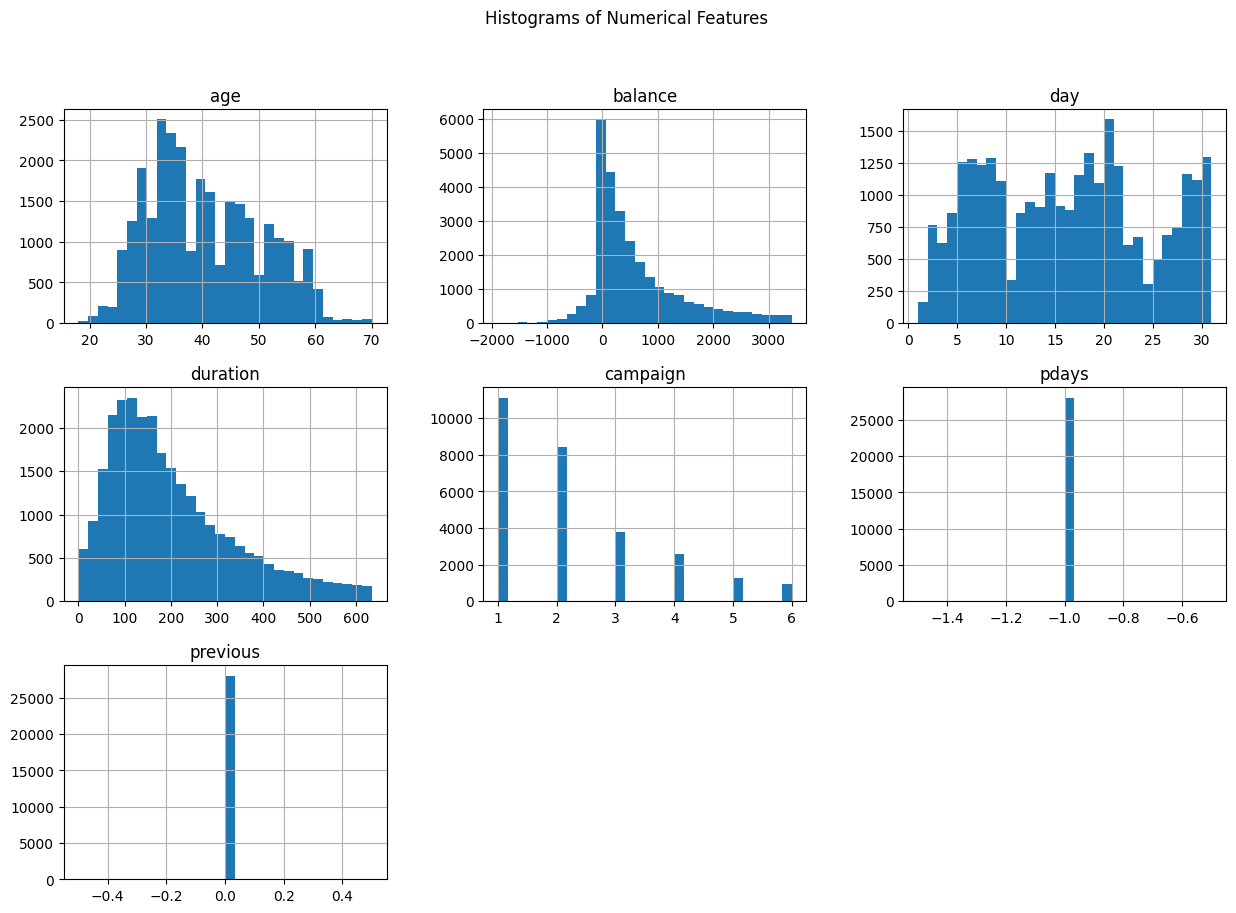

Checking for categorical columns before encoding:
Column 'job' has 0 missing values
Column 'marital' has 0 missing values
Column 'education' has 0 missing values
Column 'default' has 0 missing values
Column 'housing' has 0 missing values
Column 'loan' has 0 missing values
Column 'contact' has 0 missing values
Column 'month' has 0 missing values
Column 'poutcome' has 0 missing values
NaNs in encoded data:
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb        

In [39]:
# Data Cleanup
# Check the unique values in the 'job' column and the number of NaNs
print("Unique values in 'job' column before cleanup:")
print(data['job'].unique())
print("Number of NaNs in 'job' column before cleanup:", data['job'].isna().sum())

# Impute missing values
data['age'].fillna(data['age'].median(), inplace=True)

# Check if 'job' column has NaNs and calculate the mode correctly
if 'job' in data.columns:
    job_mode = data['job'].mode()
    if not job_mode.empty:
        data['job'].fillna(job_mode[0], inplace=True)

data['balance'].fillna(data['balance'].median(), inplace=True)

# Convert 'y' to binary values
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Drop rows where target variable 'y' is NaN
data = data.dropna(subset=['y'])

# Debugging: Check for NaNs in the dataset
print("NaNs after initial cleanup:")
print(data.isnull().sum())

# Clean data from outliers
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
def detect_and_clean_outliers(data, numerical_columns):
    data_cleaned = data.copy()
    for column in numerical_columns:
        Q1 = data_cleaned[column].quantile(0.25)
        Q3 = data_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data_cleaned = data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]
    return data_cleaned

cleaned_data = detect_and_clean_outliers(data, numerical_columns)

# Debugging: Check the shape of the cleaned data
print("Shape of cleaned data:", cleaned_data.shape)
print(cleaned_data.head())

# Display cleaned data graphically
def plot_cleaned_data(data, numerical_columns):
    data[numerical_columns].hist(bins=30, figsize=(15, 10))
    plt.suptitle('Histograms of Numerical Features')
    plt.show()

plot_cleaned_data(cleaned_data, numerical_columns)

# Ensure there are no empty columns before encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
print("Checking for categorical columns before encoding:")
for col in categorical_columns:
    if col not in cleaned_data.columns:
        print(f"Column '{col}' is missing!")
    else:
        print(f"Column '{col}' has {cleaned_data[col].isnull().sum()} missing values")

# One-hot encode categorical variables
if not cleaned_data.empty:
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_data = pd.DataFrame(encoder.fit_transform(cleaned_data[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))
else:
    raise ValueError("The cleaned dataset is empty after preprocessing steps.")

# Debugging: Check for NaNs in the encoded data
print("NaNs in encoded data:")
print(encoded_data.isnull().sum())

# Merge encoded columns with the rest of the data
cleaned_data = cleaned_data.drop(columns=categorical_columns)
cleaned_data = pd.concat([cleaned_data, encoded_data], axis=1)

# Ensure no NaNs in the dataset after encoding
cleaned_data = cleaned_data.dropna()

# Debugging: Check for NaNs in the final cleaned data
print("NaNs in final cleaned data:")
print(cleaned_data.isnull().sum())

# Check if cleaned_data is empty
if cleaned_data.empty:
    raise ValueError("The cleaned dataset is empty after preprocessing steps.")



**Task: Split the data into Training, Validation and Test Set**

In [40]:
# Split the cleaned data into training, validation, and test sets
def split_data(data, target_column, test_size=0.2, val_size=0.1, random_state=42):
    X = data.drop(columns=[target_column])
    y = data[target_column]
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_size, stratify=y_train_val, random_state=random_state)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_data(cleaned_data, target_column='y')


**Task: Data Transformation: Scale the data**

In [41]:

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

**Task: Build the 1st Model - Logistic Regression with Tuning and Optimization**

In [42]:
# Build the logistic regression model
def build_logistic_regression_model(X_train, y_train):
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    return model

model = build_logistic_regression_model(X_train, y_train)

# Hyperparameter tuning
def hyperparameter_tuning(X_train, y_train):
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }
    grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

best_model = hyperparameter_tuning(X_train, y_train)
# Print model parameters
print("Model coefficients:", best_model.coef_)
print("Model intercept:", best_model.intercept_)

Model coefficients: [[ 0.3971534  -0.13654324  0.13737576 -0.20207811  1.44797592  0.04262879
   0.          0.         -0.13200642 -0.0431841  -0.04586203 -0.26732187
   0.04099025 -0.05455699  0.02721716 -0.01917869 -0.19450234 -0.02428048
  -0.09005564  0.06880816 -0.07577922  0.          0.22257912 -0.0182677
   0.          0.08494499 -0.05196592  0.05809251 -0.46361119  0.09750965
   0.03248318  0.          0.11677756 -0.03723069  0.32666259 -0.27519004
   0.35031311  0.02790636 -0.24406093  0.07705691]]
Model intercept: [-5.58308575]


Task: Run the model, Validation and Test - Show results

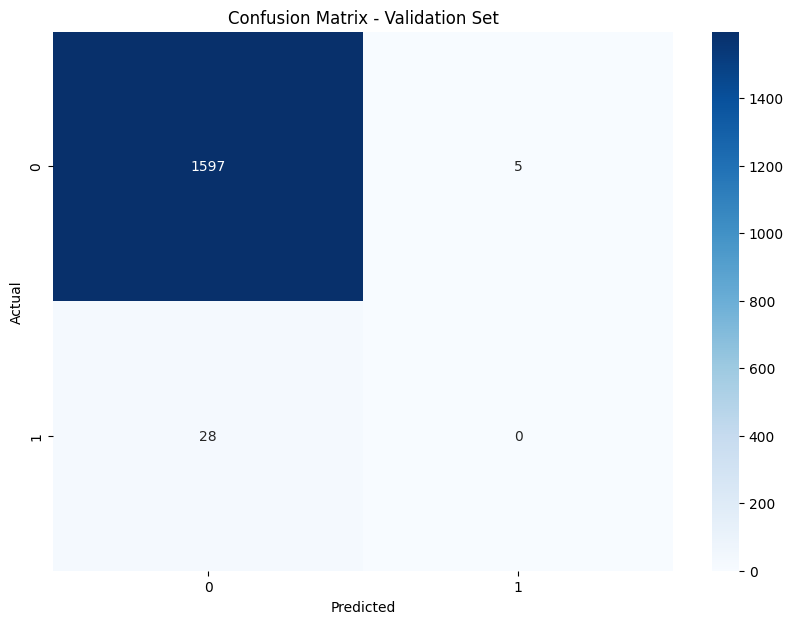

Classification Report - Validation Set:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1602
         1.0       0.00      0.00      0.00        28

    accuracy                           0.98      1630
   macro avg       0.49      0.50      0.49      1630
weighted avg       0.97      0.98      0.97      1630



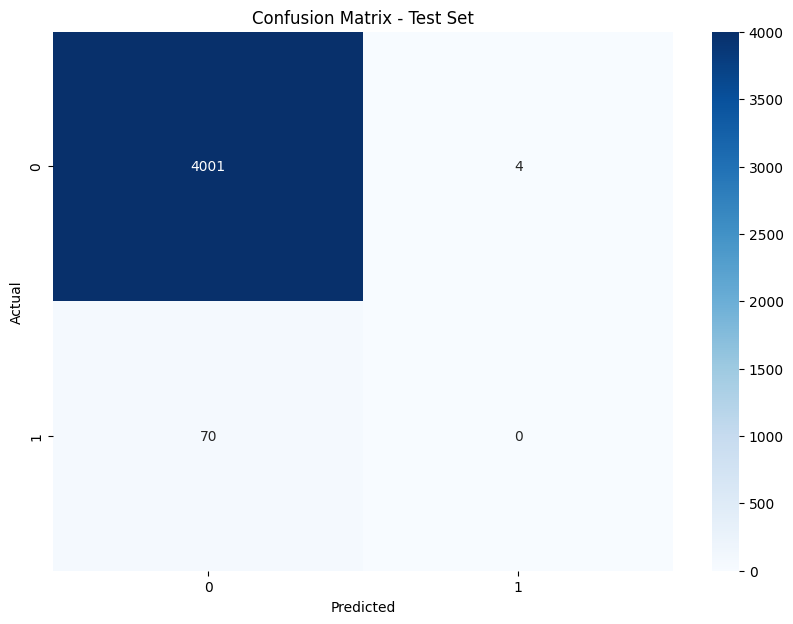

Classification Report - Test Set:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      4005
         1.0       0.00      0.00      0.00        70

    accuracy                           0.98      4075
   macro avg       0.49      0.50      0.50      4075
weighted avg       0.97      0.98      0.97      4075

Accuracy: 0.9818
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


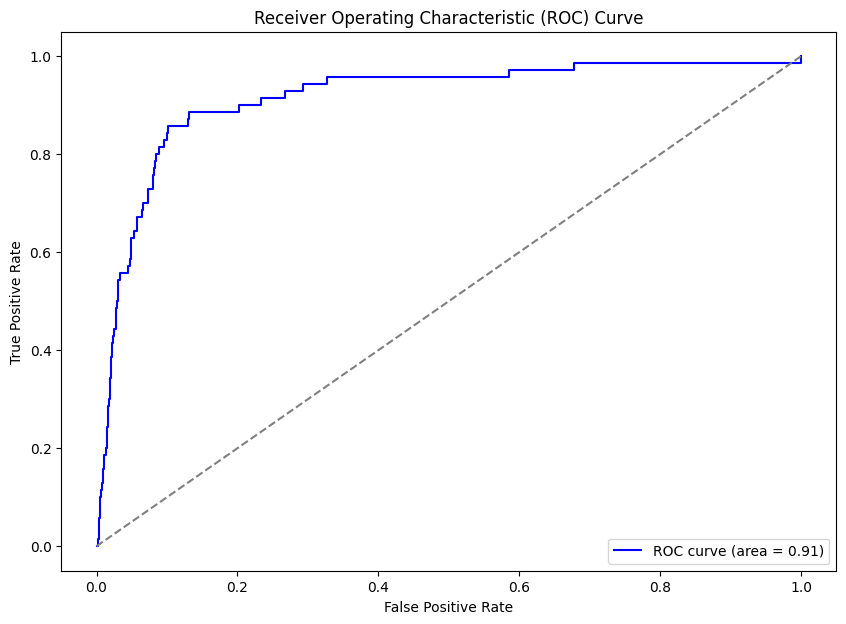

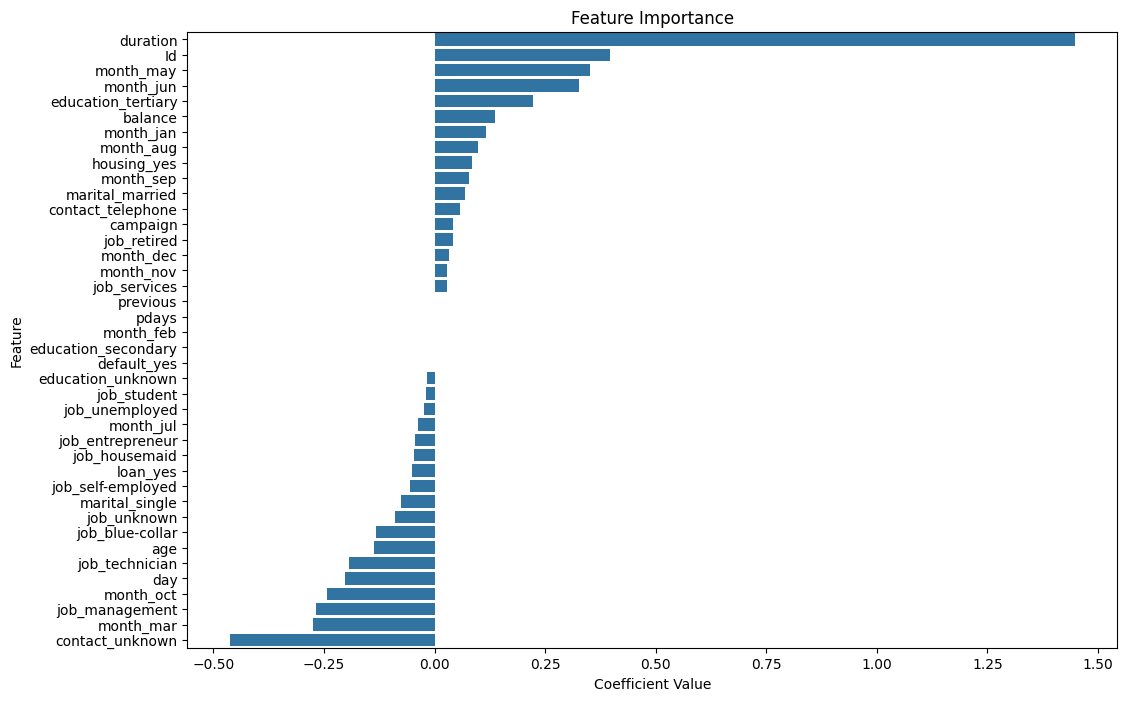

In [45]:

# Validate the model
def validate_model(model, X_val, y_val):
    y_val_pred = model.predict(X_val)
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Validation Set')
    plt.show()
    print("Classification Report - Validation Set:")
    print(classification_report(y_val, y_val_pred))

validate_model(best_model, X_val, y_val)

# Test the model
def test_model(model, X_test, y_test):
    y_test_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Test Set')
    plt.show()
    print("Classification Report - Test Set:")
    print(classification_report(y_test, y_test_pred))
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

     # ROC Curve and AUC
    y_test_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)

    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

test_model(best_model, X_test, y_test)

# Plot feature importance
def plot_feature_importance(model, feature_names):
    importance = model.coef_[0]
    feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importance, y=feature_importance.index)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.show()

plot_feature_importance(best_model, cleaned_data.drop(columns=['y']).columns)
